In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fur.path_assistant as path_assistant
shift = path_assistant.PathAssistant('shift_03_16_2020',
    ignore_files=['RefCurve_2020-03-16_0_084020_test.Wfm.bin',
                  'RefCurve_2020-03-16_153_155200.Wfm.bin'])

In [2]:
meas_ROUND = pd.read_csv(shift.get_results_dir().fi('meas_ROUND_03_16_2020.csv'), index_col=0)
meas_ROUND_LONG = pd.read_csv(shift.get_results_dir().fi('meas_ROUND_LONG_03_16_2020.csv'), index_col=0)
theor_ROUND = pd.read_csv(shift.get_results_dir().fi('theor_ROUND_03_16_2020.csv'), index_col=0)
theor_ROUND_LONG = pd.read_csv(shift.get_results_dir().fi('theor_ROUND_LONG_03_16_2020.csv'), index_col=0)

In [3]:
from config import get_from_config
cur_to_sum_channel = get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")
sum_channel_to_photoelectrons = get_from_config('sum_channel_to_photoelectrons')
N_to_I = 1/sum_channel_to_photoelectrons/cur_to_sum_channel

In [4]:
theor_ROUND

,N,sx,sy,sz,sx_err_stat,sy_err_stat,sz_err_stat,sx_err_sm,sy_err_sm,sz_err_sm,...,Mzder,Meder,M_err_no_Ebeam,M_err_due_to_Ebeam,M_err_with_Ebeam,varN,varN_top_no_Ebeam,varN_bottom_no_Ebeam,varN_top_with_Ebeam,varN_bottom_with_Ebeam
0,0.000000e+00,409.968673,219.555595,20.648305,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,91141.079387,207438.628328,45955.794362,207438.628328,212468.161280,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.606305e+05,412.101384,221.232034,20.785968,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,92118.401718,210827.293647,46515.833261,210827.293647,215897.824191,2.961064e+05,2.969897e+05,2.952650e+05,3.006148e+05,2.925117e+05
2,5.212609e+05,414.234094,222.908474,20.923632,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,93101.050437,214251.869320,47079.473045,214251.869320,219363.488962,6.607431e+05,6.641976e+05,6.574517e+05,6.784432e+05,6.466259e+05
3,7.818914e+05,416.366804,224.584914,21.061295,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,94088.756649,217712.407865,47646.438458,217712.407865,222865.151237,1.090402e+06,1.098003e+06,1.083158e+06,1.129495e+06,1.059213e+06
4,1.042522e+06,418.499514,226.261353,21.198958,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,95082.263431,221209.567448,48217.048566,221209.567448,226403.525818,1.581730e+06,1.594945e+06,1.569133e+06,1.649959e+06,1.527280e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.475989e+07,552.356220,330.108504,29.519782,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,168048.835688,516583.339851,90174.081239,516583.339851,524394.614712,1.483401e+08,1.506281e+08,1.461338e+08,1.629477e+08,1.365255e+08
96,2.502052e+07,553.175101,330.874349,29.586048,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,168620.081812,519352.797593,90529.633728,519352.797593,527183.974482,1.505069e+08,1.528261e+08,1.482703e+08,1.653343e+08,1.385137e+08
97,2.528116e+07,553.993983,331.640194,29.652313,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,169192.260141,522131.902051,90885.916893,522131.902051,529982.993151,1.526769e+08,1.550273e+08,1.504100e+08,1.677244e+08,1.405048e+08
98,2.554179e+07,554.812864,332.406039,29.718578,2.023709,0.683176,0.091192,5.191876,5.795252,0,...,169765.370674,524920.669554,91242.930997,524920.669554,532791.687042,1.548498e+08,1.572314e+08,1.525528e+08,1.701176e+08,1.424987e+08


In [5]:
theor_ROUND_LONG

,N,sx,sy,sz,sx_err_stat,sy_err_stat,sz_err_stat,sx_err_sm,sy_err_sm,sz_err_sm,...,Mzder,Meder,M_err_no_Ebeam,M_err_due_to_Ebeam,M_err_with_Ebeam,varN,varN_top_no_Ebeam,varN_bottom_no_Ebeam,varN_top_with_Ebeam,varN_bottom_with_Ebeam
0,0.000000e+00,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.377855e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,2.495832e+05,2.555442e+05,2.466183e+05,2.560310e+05,2.465026e+05
2,4.755710e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,5.227617e+05,5.466059e+05,5.109021e+05,5.485529e+05,5.104395e+05
3,7.133565e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,8.195356e+05,8.731851e+05,7.928515e+05,8.775657e+05,7.918106e+05
4,9.511420e+05,520.223102,211.887218,43.217790,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,110894.964841,5.296240e+05,1.608739e+06,5.296240e+05,1.693677e+06,1.139905e+06,1.235282e+06,1.092467e+06,1.243070e+06,1.090616e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.258962e+07,903.838854,239.148215,99.635049,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.241484e+06,3.430019e+06,2.241484e+06,4.097473e+06,4.723861e+07,5.213353e+07,4.373516e+07,5.332109e+07,4.316605e+07
96,2.282741e+07,903.838854,239.148215,99.635049,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.241484e+06,3.430019e+06,2.241484e+06,4.097473e+06,4.799805e+07,5.299657e+07,4.442046e+07,5.420926e+07,4.383931e+07
97,2.306519e+07,903.838854,239.148215,99.635049,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.241484e+06,3.430019e+06,2.241484e+06,4.097473e+06,4.876296e+07,5.386615e+07,4.511044e+07,5.510424e+07,4.451712e+07
98,2.330298e+07,903.838854,239.148215,99.635049,100.020347,2.513377,11.90688,30.36843,4.583737,0,...,207781.422901,2.241484e+06,3.430019e+06,2.241484e+06,4.097473e+06,4.953333e+07,5.474228e+07,4.580511e+07,5.600603e+07,4.519949e+07


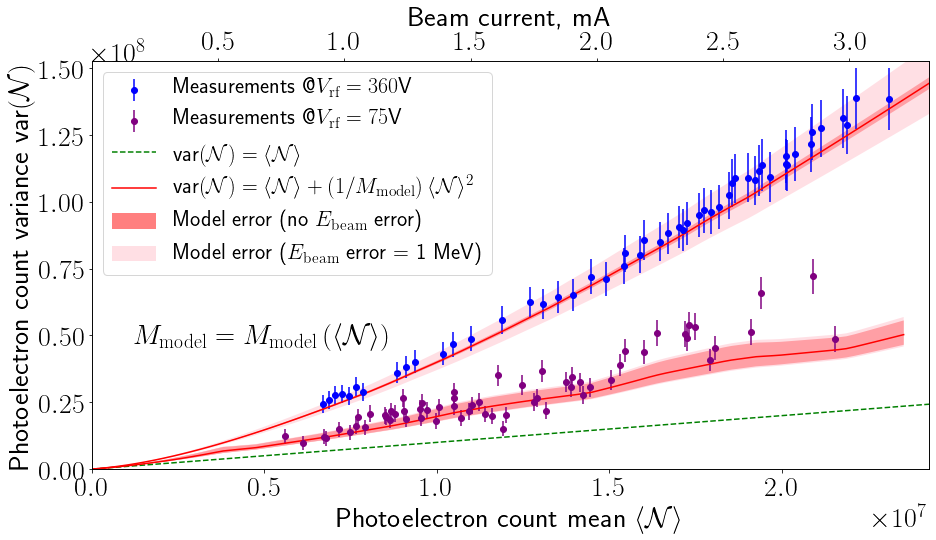

In [6]:
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
colors = {"ROUND": 'blue', "ROUNDLONG": 'purple'}

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas_ROUND['N'],meas_ROUND['varN'],marker='o',linestyle='None',yerr=meas_ROUND['errorbar'],color='b', label = r'Measurements @$V_{\mathrm{rf}}=360$V')
ax.errorbar(meas_ROUND_LONG['N'],meas_ROUND_LONG['varN'],marker='o',linestyle='None',yerr=meas_ROUND_LONG['errorbar'],color='purple', label = r'Measurements @$V_{\mathrm{rf}}=75$V')
ax.plot(theor_ROUND['N'], theor_ROUND['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")


ax.plot(theor_ROUND['N'], theor_ROUND['varN'], color='red', label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_no_Ebeam'],
    theor_ROUND['varN_top_no_Ebeam'],
    facecolor='red', alpha=0.5, label='Model error (no $E_{\mathrm{beam}}$ error)')
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_with_Ebeam'],
    theor_ROUND['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5, label='Model error ($E_{\mathrm{beam}}$ error = 1 MeV)')

ax.plot(theor_ROUND_LONG['N'], theor_ROUND_LONG['varN'], color='red')
ax.fill_between(
    theor_ROUND_LONG['N'],
    theor_ROUND_LONG['varN_bottom_no_Ebeam'],
    theor_ROUND_LONG['varN_top_no_Ebeam'],
    facecolor='red', alpha=0.5)
ax.fill_between(
    theor_ROUND_LONG['N'],
    theor_ROUND_LONG['varN_bottom_with_Ebeam'],
    theor_ROUND_LONG['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5)

ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
#ax.set_title(r"Round beam, no ND filters, variable beam current")
handles, labels = plt.gca().get_legend_handles_labels()
order = [4,5,0,1,2,3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.text(0.05,0.55-0.25,r'$M_{\mathrm{model}}=M_{\mathrm{model}}\left(\langle\mathcal{N}\rangle\right)$',transform=ax.transAxes)
ax.set_xlim(0, 1.05*meas_ROUND['N'].max())
ax.set_ylim(0, 1.1*meas_ROUND['varN'].max())
ax1 = ax.twiny()
ax1.set_xlabel('Beam current, mA')
ax1.set_xlim(N_to_I*np.asarray(ax.get_xlim()))
ax1.set_xticks(ticks=ax1.get_xticks()[1:-1])
plt.savefig(os.path.join(get_from_config('PRL_images'),'round_round_long.png'),bbox_inches='tight',dpi=300)
plt.show()

# for IPAC20

In [7]:
from config import get_from_config
cur_to_sum_channel = get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")
sum_channel_to_photoelectrons = get_from_config('sum_channel_to_photoelectrons')
N_to_I = 1/sum_channel_to_photoelectrons/cur_to_sum_channel

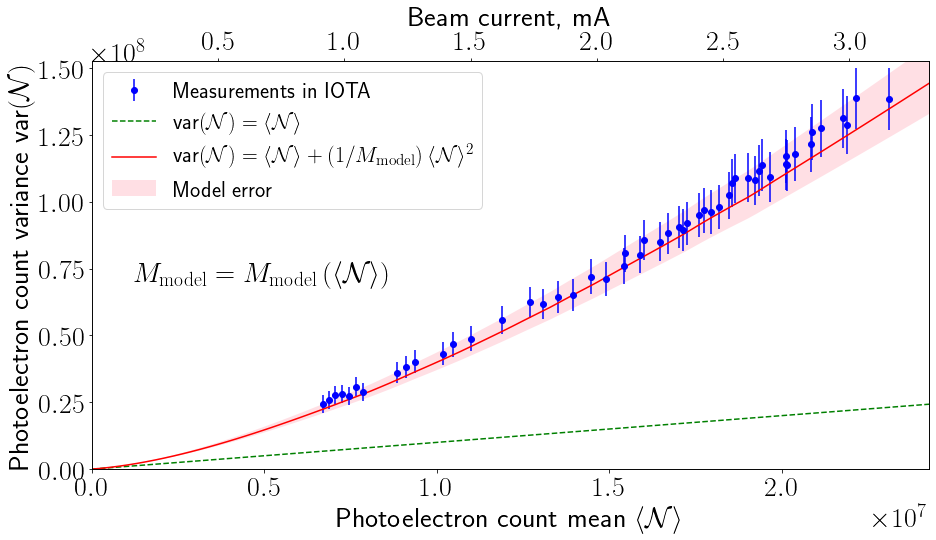

In [8]:
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
colors = {"ROUND": 'blue', "ROUNDLONG": 'purple'}

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas_ROUND['N'],meas_ROUND['varN'],marker='o',linestyle='None',yerr=meas_ROUND['errorbar'],color='b',
            label = r'Measurements in IOTA')
ax.plot(theor_ROUND['N'], theor_ROUND['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")


ax.plot(theor_ROUND['N'], theor_ROUND['varN'], color='red', label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
# ax.fill_between(
#     theor_ROUND['N'],
#     theor_ROUND['varN_bottom_no_Ebeam'],
#     theor_ROUND['varN_top_no_Ebeam'],
#     facecolor='red', alpha=0.5, label='Model error (no $E_{\mathrm{beam}}$ error)')
ax.fill_between(
    theor_ROUND['N'],
    theor_ROUND['varN_bottom_with_Ebeam'],
    theor_ROUND['varN_top_with_Ebeam'],
    facecolor='pink', alpha=0.5, label='Model error')


ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
#ax.set_title(r"Round beam, no ND filters, variable beam current")
handles, labels = ax.get_legend_handles_labels()
order = [3,0,1,2]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.text(0.05,0.55-0.1,r'$M_{\mathrm{model}}=M_{\mathrm{model}}\left(\langle\mathcal{N}\rangle\right)$',transform=ax.transAxes)
ax.set_xlim(0, 1.05*meas_ROUND['N'].max())
ax.set_ylim(0, 1.1*meas_ROUND['varN'].max())
ax1 = ax.twiny()
ax1.set_xlabel('Beam current, mA')
ax1.set_xlim(N_to_I*np.asarray(ax.get_xlim()))
ax1.set_xticks(ticks=ax1.get_xticks()[1:-1])
plt.show()